In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata, genpareto
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

In [2]:
df = pd.read_excel("USA_Brent.xlsx")

In [3]:
print(df.dtypes)

Date           datetime64[ns]
Close_sp              float64
Brent_Crude           float64
dtype: object


In [4]:
#Define the date ranges
pre_covid_start = '2015-01-01'
pre_covid_end = '2020-02-29'
covid_start = '2020-03-01'
covid_end = '2022-02-28'
post_covid_start = '2022-03-01'
post_covid_end = '2024-03-31'

In [5]:
# Filter the data
pre_covid_data = df[(df['Date'] >= pre_covid_start) & (df['Date'] <= pre_covid_end)]
covid_data = df[(df['Date'] >= covid_start) & (df['Date'] <= covid_end)]
post_covid_data = df[(df['Date'] >= post_covid_start) & (df['Date'] <= post_covid_end)]

In [6]:
# Forward fill missing values
post_covid_data.fillna(method='ffill', inplace=True)

C:\Users\KASHISH NIGAM\AppData\Local\Temp\ipykernel_13452\2437016192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid_data.fillna(method='ffill', inplace=True)


In [7]:
time_series_columns = ['Close_sp', 'Brent_Crude']

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Loop over each column and perform ADF test
for column in time_series_columns:
    print(f"ADF Test Results for {column}:")
    adf_test(post_covid_data[column])
    print()

ADF Test Results for Close_sp:
ADF Statistic: -0.2585469704111174
p-value: 0.9311735882432163
Critical Values:
   1%: -3.4426552678216003
   5%: -2.8669676577777548
   10%: -2.569660749624767

ADF Test Results for Brent_Crude:
ADF Statistic: -2.317774701432883
p-value: 0.16629934239780764
Critical Values:
   1%: -3.442701754304053
   5%: -2.866988120523906
   10%: -2.5696716542766693



In [8]:
#The seris is non-sttionary

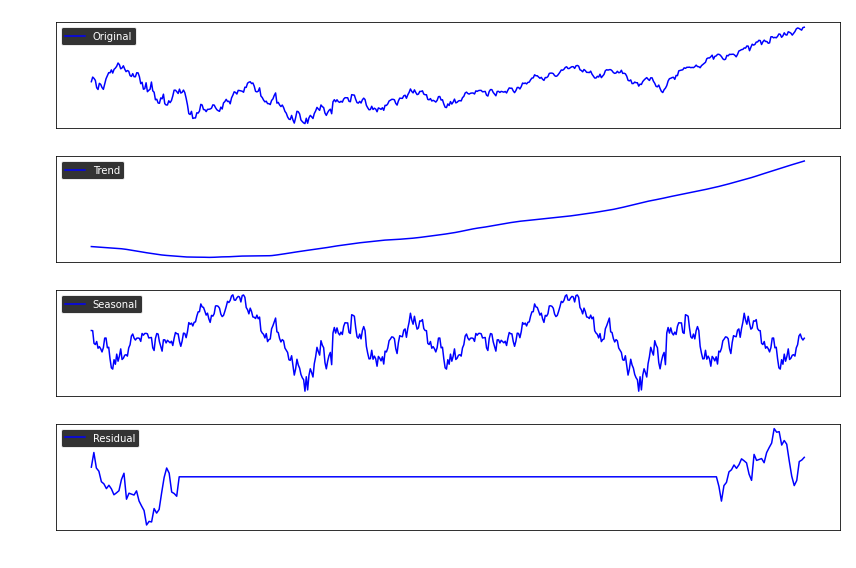

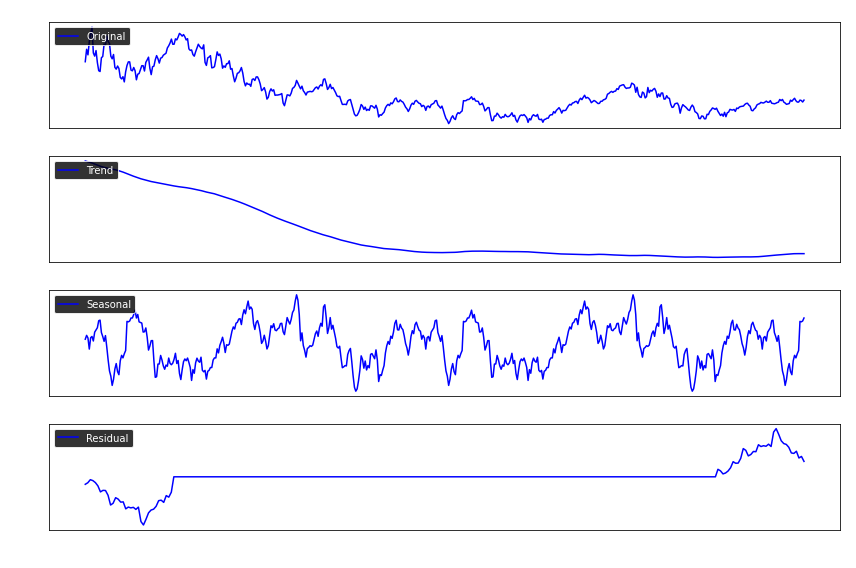

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(post_covid_data['Close_sp'], model='additive', period=250)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(post_covid_data['Close_sp'], label='Original', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Original', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Time Series Decomposition', color='white')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Trend', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Seasonal', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Residual', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Date', color='white')

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(post_covid_data['Brent_Crude'], model='additive', period=250)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(post_covid_data['Brent_Crude'], label='Original', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Original', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Time Series Decomposition', color='white')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Trend', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Seasonal', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='blue')
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
plt.ylabel('Residual', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Date', color='white')

plt.tight_layout()
plt.show()

In [10]:
summary = post_covid_data.describe()
print(summary)

          Close_sp  Brent_Crude
count   535.000000   535.000000
mean   4259.969745    90.741607
std     372.028297    13.880732
min    3577.030029    71.030000
25%    3975.640015    81.050000
50%    4175.479980    85.910000
75%    4484.304932    96.500000
max    5254.350098   133.180000


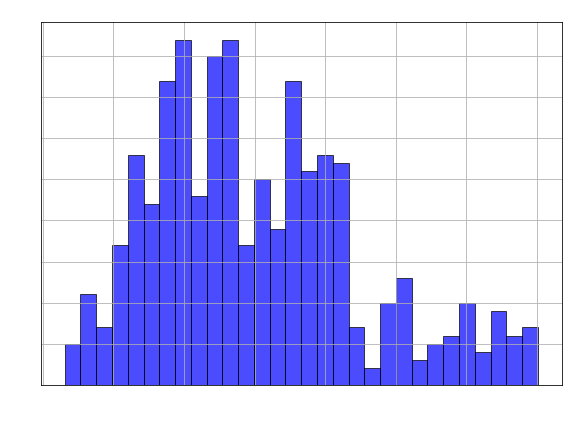

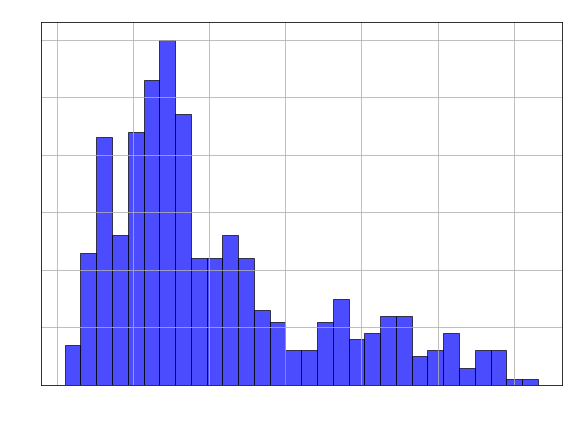

In [11]:
import matplotlib.pyplot as plt

# Plot histogram for 'Close_sp'
plt.figure(figsize=(8, 6))
plt.hist(post_covid_data['Close_sp'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Close_sp', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Histogram of Close_sp', color='white')

# Customize tick parameters to be white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram for 'Brent_Crude'
plt.figure(figsize=(8, 6))
plt.hist(post_covid_data['Brent_Crude'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Brent_Crude', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Histogram of Brent_Crude', color='white')

# Customize tick parameters to be white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
post_covid_data = post_covid_data.copy()
post_covid_data['Log_Return_Close_sp'] = np.log(post_covid_data['Close_sp'] / post_covid_data['Close_sp'].shift(1))
post_covid_data['Log_Return_Brent_Crude'] = np.log(post_covid_data['Brent_Crude'] / post_covid_data['Brent_Crude'].shift(1))

In [13]:
missing_values = post_covid_data.isnull().sum()
print(missing_values)

Date                      0
Close_sp                  0
Brent_Crude               0
Log_Return_Close_sp       1
Log_Return_Brent_Crude    1
dtype: int64


In [14]:
post_covid_data = post_covid_data.dropna()

In [15]:
missing_values = post_covid_data.isnull().sum()
print(missing_values)

Date                      0
Close_sp                  0
Brent_Crude               0
Log_Return_Close_sp       0
Log_Return_Brent_Crude    0
dtype: int64


In [16]:
import pandas as pd
from scipy.stats import skew, kurtosis, jarque_bera

# Create a summary statistics DataFrame for post_covid_data
summary_stats = pd.DataFrame(index=post_covid_data.columns, columns=['Mean', 'Max', 'Min', 'SD', 'Skew', 'Ex. Kurt.', 'J–B'])

for col in post_covid_data.columns:
    if pd.api.types.is_numeric_dtype(post_covid_data[col]):
        summary_stats.at[col, 'Mean'] = post_covid_data[col].mean()
        summary_stats.at[col, 'Max'] = post_covid_data[col].max()
        summary_stats.at[col, 'Min'] = post_covid_data[col].min()
        summary_stats.at[col, 'SD'] = post_covid_data[col].std()
        summary_stats.at[col, 'Skew'] = skew(post_covid_data[col])
        summary_stats.at[col, 'Ex. Kurt.'] = kurtosis(post_covid_data[col], fisher=True)
        jb_stat, jb_p_value = jarque_bera(post_covid_data[col])
        summary_stats.at[col, 'J–B'] = jb_stat
    else:
        summary_stats.at[col, 'Mean'] = 'N/A'
        summary_stats.at[col, 'Max'] = 'N/A'
        summary_stats.at[col, 'Min'] = 'N/A'
        summary_stats.at[col, 'SD'] = 'N/A'
        summary_stats.at[col, 'Skew'] = 'N/A'
        summary_stats.at[col, 'Ex. Kurt.'] = 'N/A'
        summary_stats.at[col, 'J–B'] = 'N/A'

# Round the summary statistics to 6 decimal places, except for 'N/A' values
summary_stats = summary_stats.applymap(lambda x: round(x, 6) if isinstance(x, (int, float)) else x)
print(summary_stats)

                               Mean          Max          Min         SD  \
Date                            N/A          N/A          N/A        N/A   
Close_sp                4259.883059  5254.350098  3577.030029  372.37172   
Brent_Crude               90.703801       133.18        71.03   13.86615   
Log_Return_Close_sp        0.000373     0.053953    -0.044199   0.011586   
Log_Return_Brent_Crude    -0.000473     0.081564    -0.133124   0.024845   

                            Skew Ex. Kurt.         J–B  
Date                         N/A       N/A         N/A  
Close_sp                0.670554 -0.053396   40.081671  
Brent_Crude             1.041339  0.206289   97.457328  
Log_Return_Close_sp    -0.179857  1.861547   79.983237  
Log_Return_Brent_Crude -0.504739  2.221611  132.489874  


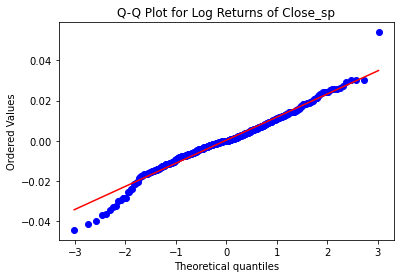

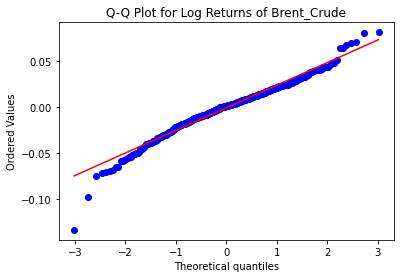

In [24]:
import scipy.stats as stats
# Plot Q-Q plot for 'Log_Return_Close_nifty'
stats.probplot(post_covid_data['Log_Return_Close_sp'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Log Returns of Close_sp')
plt.show()

# Plot Q-Q plot for 'Log_Return_Brent_INR'
stats.probplot(post_covid_data['Log_Return_Brent_Crude'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Log Returns of Brent_Crude')
plt.show()

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
# Augmented Dickey-Fuller Test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print('')

# KPSS Test
def kpss_test(series, title=''):
    print(f'KPSS Test: {title}')
    result = kpss(series, regression='c', nlags="auto")
    labels = ['KPSS Statistic', 'p-value', 'Lags Used']
    out = pd.Series(result[:3], index=labels)
    for key, value in result[3].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print('')

In [26]:
# Perform ADF test for Close_nifty log returns
adf_test(post_covid_data['Log_Return_Close_sp'], title='Log Return Close_sp')

# Perform KPSS test for Close_nifty log returns
kpss_test(post_covid_data['Log_Return_Close_sp'], title='Log Return Close_sp')

# Perform ADF test for Brent_INR log returns
adf_test(post_covid_data['Log_Return_Brent_Crude'], title='Log Return Brent_Crude')

# Perform KPSS test for Brent_INR log returns
kpss_test(post_covid_data['Log_Return_Brent_Crude'], title='Log Return Brent_Crude')

Augmented Dickey-Fuller Test: Log Return Close_sp
ADF Statistic                  -23.003897
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64

KPSS Test: Log Return Close_sp
KPSS Statistic           0.252437
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Augmented Dickey-Fuller Test: Log Return Brent_Crude
ADF Statistic                 -1.741675e+01
p-value                        4.851285e-30
#Lags Used                     1.000000e+00
Number of Observations Used    5.320000e+02
Critical Value (1%)           -3.442702e+00
Critical Value (5%)           -2.866988e+00
Critical Value (10%)          -2.56967

C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [27]:
# Let's interpret the results of the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the log returns of "Close_sp" and "Brent_Crude" with the updated statistics.

# ### Log Return Close_sp

# **ADF Test:**
# - **ADF Statistic:** -23.003897
# - **p-value:** 0.000000
# - **#Lags Used:** 0
# - **Number of Observations Used:** 533
# - **Critical Values:**
#   - 1%: -3.442678
#   - 5%: -2.866978
#   - 10%: -2.569666

# **Interpretation:**
# The ADF statistic of -23.003897 is much lower than the critical values at the 1%, 5%, and 10% levels. The p-value is effectively zero, indicating very strong evidence to reject the null hypothesis of a unit root. This means that the log returns of "Close_sp" are stationary.

# **KPSS Test:**
# - **KPSS Statistic:** 0.252437
# - **p-value:** 0.100000 (indicates that the true p-value is greater than 0.1 due to the interpolation warning)
# - **Lags Used:** 4
# - **Critical Values:**
#   - 1%: 0.739000
#   - 5%: 0.463000
#   - 2.5%: 0.574000
#   - 10%: 0.347000

# **Interpretation:**
# The KPSS statistic of 0.252437 is lower than the critical values at the 1%, 5%, and 10% levels. This indicates that we cannot reject the null hypothesis of stationarity. Thus, the log returns of "Close_sp" are stationary according to the KPSS test as well.

# ### Log Return Brent_Crude

# **ADF Test:**
# - **ADF Statistic:** -17.41675
# - **p-value:** 4.851285e-30
# - **#Lags Used:** 1
# - **Number of Observations Used:** 532
# - **Critical Values:**
#   - 1%: -3.442702
#   - 5%: -2.866988
#   - 10%: -2.569672

# **Interpretation:**
# The ADF statistic of -17.41675 is much lower than the critical values at the 1%, 5%, and 10% levels. The p-value is extremely small (4.851285e-30), indicating very strong evidence to reject the null hypothesis of a unit root. This means that the log returns of "Brent_Crude" are stationary.

# **KPSS Test:**
# - **KPSS Statistic:** 0.06611
# - **p-value:** 0.10000 (indicates that the true p-value is greater than 0.1 due to the interpolation warning)
# - **Lags Used:** 5
# - **Critical Values:**
#   - 1%: 0.73900
#   - 5%: 0.46300
#   - 2.5%: 0.57400
#   - 10%: 0.34700

# **Interpretation:**
# The KPSS statistic of 0.06611 is much lower than the critical values at the 1%, 5%, and 10% levels. This indicates that we cannot reject the null hypothesis of stationarity. Thus, the log returns of "Brent_Crude" are stationary according to the KPSS test as well.

# ### Summary
# - **Log Return Close_sp:** The log returns are stationary based on both the ADF and KPSS tests.
# - **Log Return Brent_Crude:** The log returns are stationary based on both the ADF and KPSS tests.

# Both the ADF and KPSS tests consistently indicate that the log returns of "Close_sp" and "Brent_Crude" are stationary. This strong confirmation suggests that the log returns of these series do not have a unit root and are suitable for time series modeling that assumes stationarity.

In [28]:
# Rescale the log returns
post_covid_data['Log_Return_Close_sp_scaled'] = post_covid_data['Log_Return_Close_sp'] * 100
post_covid_data['Log_Return_Brent_Crude_scaled'] = post_covid_data['Log_Return_Brent_Crude'] * 100

In [29]:
from arch import arch_model
# Refit the models with the rescaled data
model_close_sp_scaled = arch_model(post_covid_data['Log_Return_Close_sp_scaled'], vol='Garch', p=1, o=1, q=1)
results_close_sp_scaled = model_close_sp_scaled.fit(disp='off')
print(results_close_sp_scaled.summary())


from arch import arch_model
model_brent_Crude_scaled = arch_model(post_covid_data['Log_Return_Brent_Crude_scaled'], vol='Garch', p=1, o=1, q=1)
results_brent_Crude_scaled = model_brent_Crude_scaled.fit(disp='off')
print(results_brent_Crude_scaled.summary())

                       Constant Mean - GJR-GARCH Model Results                        
Dep. Variable:     Log_Return_Close_sp_scaled   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          GJR-GARCH   Log-Likelihood:               -768.632
Distribution:                          Normal   AIC:                           1547.26
Method:                    Maximum Likelihood   BIC:                           1568.67
                                                No. Observations:                  534
Date:                        Tue, Jun 04 2024   Df Residuals:                      533
Time:                                09:35:31   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------------------------------------------------

In [30]:
# The revised GJR-GARCH model results provide an updated perspective on the volatility characteristics of the log returns for "Close_sp" and "Brent_Crude". Here's a detailed interpretation of these results:

# ### Log_Return_Close_sp

# **Mean Model:**
# - **mu:** 0.0573, with a standard error of 0.04108 and a p-value of 0.163.
#   - Interpretation: The mean return is not statistically significant at the 5% level, indicating that there is no strong evidence that the mean return is different from zero. The 95% confidence interval is [-0.02323, 0.138].

# **Volatility Model (GJR-GARCH):**
# - **omega:** 0.0053, with a standard error of 0.00518 and a p-value of 0.308.
#   - Interpretation: The constant term in the volatility equation is not statistically significant, suggesting that the baseline volatility is not significantly different from zero.
# - **alpha[1]:** 2.6016e-10, with a standard error of 0.09739 and a p-value of 1.000.
#   - Interpretation: The GARCH term is not statistically significant, indicating that past squared returns do not have a significant influence on current volatility.
# - **gamma[1]:** 0.0643, with a standard error of 0.04057 and a p-value of 0.113.
#   - Interpretation: The asymmetric term is not statistically significant, suggesting that there is no strong evidence of leverage effects (i.e., negative returns do not significantly increase volatility compared to positive returns).
# - **beta[1]:** 0.9594, with a standard error of 0.07864 and a p-value of approximately 0.
#   - Interpretation: The GARCH term is highly significant, indicating that past volatility has a strong influence on current volatility.

# ### Log_Return_Brent_Crude

# **Mean Model:**
# - **mu:** -0.0516, with a standard error of 0.112 and a p-value of 0.644.
#   - Interpretation: The mean return is not statistically significant, indicating that there is no strong evidence that the mean return is different from zero. The 95% confidence interval is [-0.270, 0.167].

# **Volatility Model (GJR-GARCH):**
# - **omega:** 0.1259, with a standard error of 0.07222 and a p-value of 0.08128.
#   - Interpretation: The constant term in the volatility equation is marginally significant at the 10% level, suggesting a borderline significant baseline volatility.
# - **alpha[1]:** 5.5863e-12, with a standard error of 0.07642 and a p-value of 1.000.
#   - Interpretation: The GARCH term is not statistically significant, indicating that past squared returns do not have a significant influence on current volatility.
# - **gamma[1]:** 0.0785, with a standard error of 0.08271 and a p-value of 0.343.
#   - Interpretation: The asymmetric term is not statistically significant, suggesting that there is no strong evidence of leverage effects.
# - **beta[1]:** 0.9279, with a standard error of 0.03505 and a p-value of approximately 0.
#   - Interpretation: The GARCH term is highly significant, indicating that past volatility has a strong influence on current volatility.

# ### Summary

# **Log_Return_Close_sp:**
# - The mean return is not statistically significant.
# - Baseline volatility (omega) is not significant.
# - The past squared returns (alpha[1]) are not significant.
# - No significant evidence of leverage effects (gamma[1]).
# - Strong persistence in volatility (beta[1] is highly significant).

# **Log_Return_Brent_Crude:**
# - The mean return is not statistically significant.
# - Baseline volatility (omega) is marginally significant at the 10% level.
# - The past squared returns (alpha[1]) are not significant.
# - No significant evidence of leverage effects (gamma[1]).
# - Strong persistence in volatility (beta[1] is highly significant).

# In both models, the parameter `beta[1]` is highly significant, indicating that volatility persistence is a strong feature of these series. However, neither series shows significant leverage effects, and the mean returns are not significantly different from zero. The baseline volatility is only marginally significant for Brent Crude.

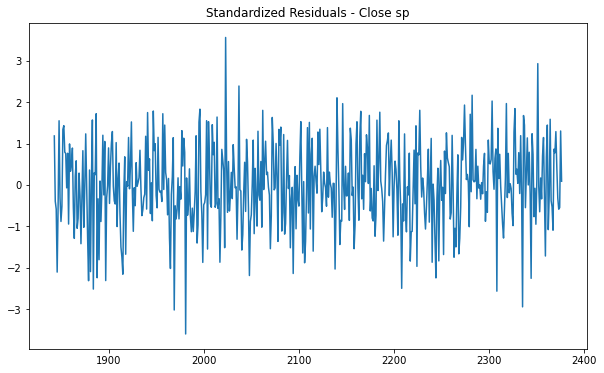

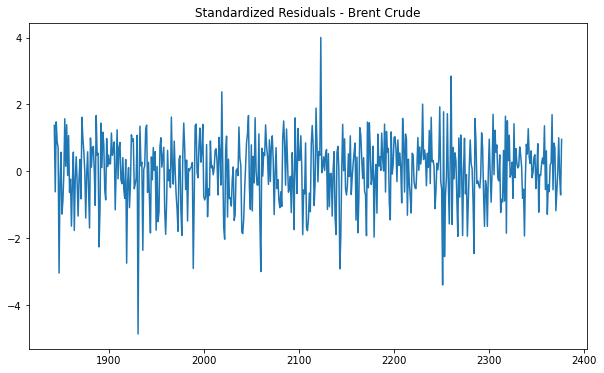

In [31]:
# Plot the standardized residuals
plt.figure(figsize=(10, 6))
plt.plot(results_close_sp_scaled.resid / results_close_sp_scaled.conditional_volatility)
plt.title('Standardized Residuals - Close sp')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results_brent_Crude_scaled.resid / results_brent_Crude_scaled.conditional_volatility)
plt.title('Standardized Residuals - Brent Crude')
plt.show()

In [32]:
# Assuming `results` is the fitted GJR-GARCH model for Close_nifty
standardized_residuals_sp = results_close_sp_scaled.resid / results_close_sp_scaled.conditional_volatility

# Assuming `results_brent` is the fitted GJR-GARCH model for Brent_INR
standardized_residuals_brent = results_brent_Crude_scaled.resid / results_brent_Crude_scaled.conditional_volatility


<AxesSubplot:ylabel='Density'>

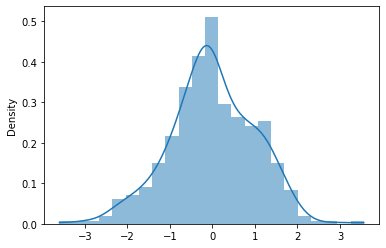

In [33]:
sns.histplot(standardized_residuals_sp, kde=True, stat="density", linewidth=0)

<AxesSubplot:ylabel='Density'>

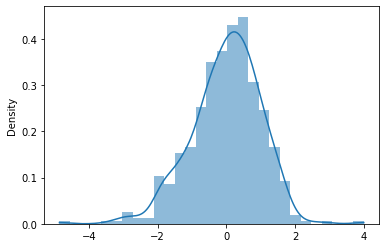

In [34]:
sns.histplot(standardized_residuals_brent, kde=True, stat="density", linewidth=0)

In [35]:
# Creating a DataFrame for easy handling
standardized_residuals = pd.DataFrame({
    'sp': standardized_residuals_sp,
    'Brent': standardized_residuals_brent
})

In [36]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for sp
shapiro_sp = shapiro(standardized_residuals['sp'])
print("Shapiro-Wilk test for sp:")
print("Test Statistic:", shapiro_sp[0])
print("p-value:", shapiro_sp[1])

# Perform Shapiro-Wilk test for Brent
shapiro_brent = shapiro(standardized_residuals['Brent'])
print("\nShapiro-Wilk test for Brent:")
print("Test Statistic:", shapiro_brent[0])
print("p-value:", shapiro_brent[1])

Shapiro-Wilk test for sp:
Test Statistic: 0.9941078804135606
p-value: 0.036532879159783635

Shapiro-Wilk test for Brent:
Test Statistic: 0.9795207466985254
p-value: 8.094862989376529e-07


In [37]:
# The updated Shapiro-Wilk test results still indicate deviations from normality for the log returns of both "Close_sp" and "Brent_Crude", though the deviation is less extreme for "Close_sp". Here's a detailed interpretation:

# ### Shapiro-Wilk Test for Normality

# **Shapiro-Wilk test for Close_sp:**
# - **Test Statistic:** 0.9941
# - **p-value:** 0.0365

# **Shapiro-Wilk test for Brent_Crude:**
# - **Test Statistic:** 0.9795
# - **p-value:** \(8.094 \times 10^{-7}\)

# ### Interpretation:

# The null hypothesis of the Shapiro-Wilk test is that the data is normally distributed. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, suggesting that the data is not normally distributed.

# **For Close_sp:**
# - The test statistic of 0.9941 and the p-value of 0.0365 suggest that we reject the null hypothesis of normality at the 5% significance level. This means the log returns of Close_sp are not normally distributed, although the deviation from normality is relatively mild.

# **For Brent_Crude:**
# - The test statistic of 0.9795 and the very low p-value (\(8.094 \times 10^{-7}\)) suggest that we reject the null hypothesis of normality. This indicates the log returns of Brent_Crude are not normally distributed, with a more pronounced deviation from normality compared to Close_sp.

# ### Summary of All Tests

# **Log_Return_Close_sp:**
# - **ADF Test:** Strong evidence of stationarity.
# - **KPSS Test:** No evidence against stationarity.
# - **GJR-GARCH Model:** Strong volatility persistence, no significant leverage effects, mean return not significant.
# - **Shapiro-Wilk Test:** Not normally distributed (mild deviation).

# **Log_Return_Brent_Crude:**
# - **ADF Test:** Strong evidence of stationarity.
# - **KPSS Test:** No evidence against stationarity.
# - **GJR-GARCH Model:** Strong volatility persistence, no significant leverage effects, mean return not significant.
# - **Shapiro-Wilk Test:** Not normally distributed (pronounced deviation).

# ### Conclusion

# Both "Close_sp" and "Brent_Crude" log returns are stationary and exhibit significant volatility persistence, as shown by the GJR-GARCH models. However, they do not exhibit significant leverage effects, and their mean returns are not significantly different from zero. The Shapiro-Wilk tests indicate that neither series follows a normal distribution, though the deviation from normality is more pronounced for Brent_Crude.

# Given these results, it's appropriate to model these time series with GARCH-type models to capture the volatility clustering. However, the lack of normality suggests that using models or distributions that account for heavy tails and skewness (e.g., t-distribution, skewed-t distribution) could improve model accuracy and risk assessment. For Close_sp, the deviation from normality is less severe, but it still warrants consideration of non-normal distributional assumptions.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, genpareto
from statsmodels.distributions.empirical_distribution import ECDF

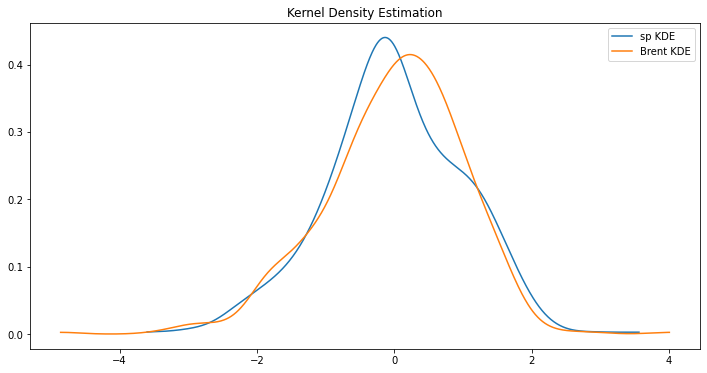

In [39]:
kde_sp = gaussian_kde(standardized_residuals['sp'])
kde_brent = gaussian_kde(standardized_residuals['Brent'])

# Plot the KDE
x_grid_sp = np.linspace(standardized_residuals['sp'].min(), standardized_residuals['sp'].max(), 1000)
x_grid_brent = np.linspace(standardized_residuals['Brent'].min(), standardized_residuals['Brent'].max(), 1000)

plt.figure(figsize=(12, 6))
plt.plot(x_grid_sp, kde_sp(x_grid_sp), label='sp KDE')
plt.plot(x_grid_brent, kde_brent(x_grid_brent), label='Brent KDE')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

In [40]:
upper_threshold_sp = np.percentile(standardized_residuals['sp'], 90)
lower_threshold_sp = np.percentile(standardized_residuals['sp'], 10)
upper_threshold_brent = np.percentile(standardized_residuals['Brent'], 90)
lower_threshold_brent = np.percentile(standardized_residuals['Brent'], 10)

In [41]:
sp_upper_tail = standardized_residuals['sp'][standardized_residuals['sp'] > upper_threshold_sp] - upper_threshold_sp
sp_lower_tail = -standardized_residuals['sp'][standardized_residuals['sp'] < lower_threshold_sp] + lower_threshold_sp
brent_upper_tail = standardized_residuals['Brent'][standardized_residuals['Brent'] > upper_threshold_brent] - upper_threshold_brent
brent_lower_tail = -standardized_residuals['Brent'][standardized_residuals['Brent'] < lower_threshold_brent] + lower_threshold_brent

In [42]:
# Fit GPD to the tails
params_sp_upper = genpareto.fit(sp_upper_tail)
params_sp_lower = genpareto.fit(sp_lower_tail)
params_brent_upper = genpareto.fit(brent_upper_tail)
params_brent_lower = genpareto.fit(brent_lower_tail)

In [43]:
from statsmodels.distributions.empirical_distribution import ECDF

# Compute empirical CDF
ecdf_sp = ECDF(standardized_residuals['sp'])
ecdf_brent = ECDF(standardized_residuals['Brent'])

In [44]:
# Function to compute combined CDF
def combined_cdf(x, ecdf, upper_threshold, lower_threshold, params_upper, params_lower):
    c_u, loc_u, scale_u = params_upper
    c_l, loc_l, scale_l = params_lower
    if x <= lower_threshold:
        return ecdf(lower_threshold) * genpareto.cdf(-x + lower_threshold, c_l, loc_l, scale_l)
    elif x <= upper_threshold:
        return ecdf(x)
    else:
        return ecdf(upper_threshold) + (1 - ecdf(upper_threshold)) * genpareto.cdf(x - upper_threshold, c_u, loc_u, scale_u)

In [45]:
cdf_sp = [combined_cdf(x, ecdf_sp, upper_threshold_sp, lower_threshold_sp, params_sp_upper, params_sp_lower) for x in standardized_residuals['sp']]
cdf_brent = [combined_cdf(x, ecdf_brent, upper_threshold_brent, lower_threshold_brent, params_brent_upper, params_brent_lower) for x in standardized_residuals['Brent']]

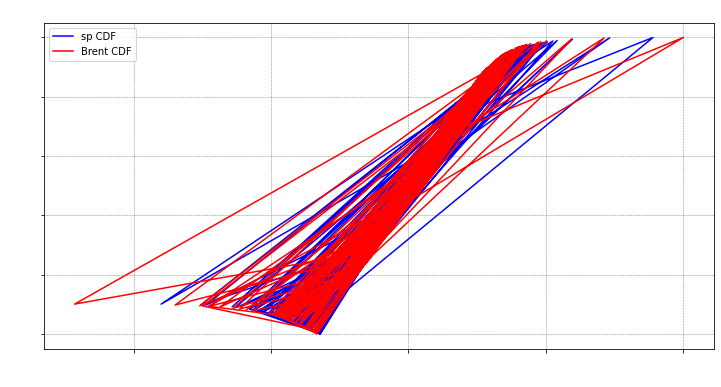

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(standardized_residuals['sp'], cdf_sp, label='sp CDF', color='blue')
plt.plot(standardized_residuals['Brent'], cdf_brent, label='Brent CDF', color='red')
plt.title('Combined CDF with EVT-GPD Tails', color='white')
plt.legend()
plt.xlabel('Standardized Residuals', color='white')
plt.ylabel('CDF', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('white')  # Set background color to white
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add grid lines
plt.show()

In [47]:
# Convert the CDF values to a uniform distribution for copula modeling
uniform_sp = np.array(cdf_sp)
uniform_brent = np.array(cdf_brent)

In [48]:
# Create a DataFrame from the uniform distributions
uniform_data = pd.DataFrame({
    'Uniform_sp': uniform_sp,
    'Uniform_Brent': uniform_brent
})

In [49]:
# Define the output file path
output_file = r'C:\Users\KASHISH NIGAM\Desktop\Last Sem Project\Final Datasets\USA\uniform_distributions-Post_Covid_USA.xlsx'

# Save the DataFrame to an Excel file
uniform_data.to_excel(output_file, index=False)

print(f"Uniform distributions saved to {output_file}")

Uniform distributions saved to C:\Users\KASHISH NIGAM\Desktop\Last Sem Project\Final Datasets\USA\uniform_distributions-Post_Covid_USA.xlsx
